# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = './dataset_task1(hw2).csv'
data = pd.read_csv(file_path)
data.head()

,x,y,class
0,1.532975,1.672484,1.0
1,3.325448,3.086013,1.0
2,1.135527,1.159368,1.0
3,0.815693,1.932934,1.0
4,0.985233,1.044151,1.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[['x', 'y']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

log_reg = LogisticRegression()
svm = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=5)

log_reg.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, precision, recall

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
svm_metrics = evaluate_model(y_test, y_pred_svm)
knn_metrics = evaluate_model(y_test, y_pred_knn)
log_reg_metrics, svm_metrics, knn_metrics


((0.955, np.float64(0.978021978021978), np.float64(0.9270833333333334)),
 (0.955, np.float64(0.978021978021978), np.float64(0.9270833333333334)),
 (0.95, np.float64(0.9574468085106383), np.float64(0.9375)))

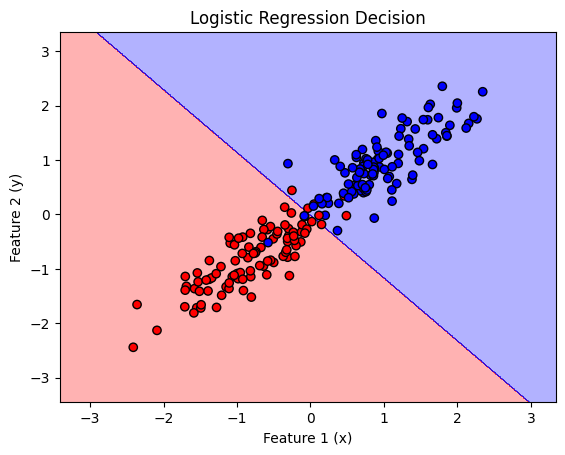

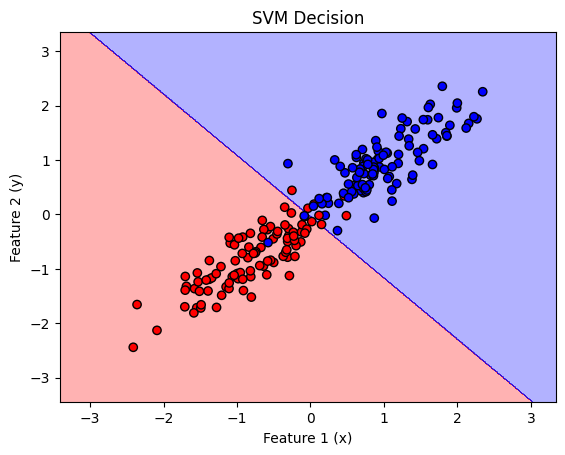

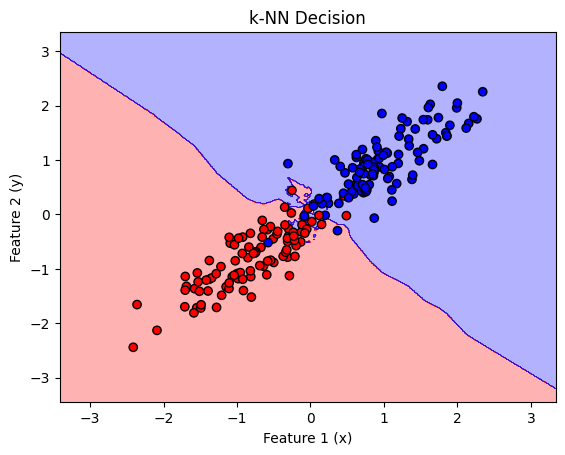

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', cmap=ListedColormap(('red', 'blue')))
    plt.title(title)
    plt.xlabel('Feature 1 (x)')
    plt.ylabel('Feature 2 (y)')
    plt.show()

plot_decision_boundaries(X_test_scaled, y_test, log_reg, "Logistic Regression Decision")
plot_decision_boundaries(X_test_scaled, y_test, svm, "SVM Decision")
plot_decision_boundaries(X_test_scaled, y_test, knn, "k-NN Decision")


**Аналіз отриманих результатів**:

1.  Logistic Regression і SVM показали однакові результати за трьома метриками:
    Точність = 95.5%
    Точність по класах = 97.8%
    Повнота = 92.7%

    k-NN продемонстрував трохи нижчу точність і точність по класах 95.0% та 95.7%, але його повнота вища 93.8%. Це означає, що k-NN краще знаходить позитивні класу, але точніше відділяти класи можуть Logistic Regression та SVM.
2.   
-  Logistic Regression є найпростіша для інтерпретації модель, оскільки вона показує лінійно роздільні межі між класами. 
-  SVM також використовує лінійну межу поділу, тому має аналогічну продуктивність. SVM здатна максимально розділяти класи, мінімізуючи вплив точок, які знаходяться близько до межі поділу.
3.  
    SVM або Logistic Regression є найкращими варіантами для цього набору даних, оскільки класи лінійно роздільні, і ці моделі забезпечують максимальну продуктивність.



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [7]:
file_path = './dataset_task2(hw2).csv'
data = pd.read_csv(file_path)

data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       900 non-null    float64
 1   y       900 non-null    float64
 2   class   900 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.2 KB


(None,
           x         y  class
 0  2.745071  1.792604      1
 1  2.971533  4.284545      1
 2  1.648770  1.648795      1
 3  4.368819  3.151152      1
 4  1.295788  2.813840      1)

In [8]:
X = data[['x', 'y']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]


(array([[ 1.06886788, -1.91260157],
        [-0.15561529,  0.75582981],
        [ 1.53530107, -1.56621147],
        [ 0.11232292,  2.00831083],
        [-0.55728648,  1.39464223]]),
 array([[-0.69807459, -1.31183507],
        [ 0.72949839,  0.49146877],
        [-0.20932881,  1.71307417],
        [ 1.88455381,  0.41073392],
        [-0.28135688, -0.46540789]]))

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

log_reg = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(random_state=42)

log_reg.fit(X_train_scaled, y_train)
tree_clf.fit(X_train, y_train)
svm_clf.fit(X_train_scaled, y_train)

log_reg_pred = log_reg.predict(X_test_scaled)
tree_clf_pred = tree_clf.predict(X_test)
svm_clf_pred = svm_clf.predict(X_test_scaled)

metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
    'Accuracy': [accuracy_score(y_test, log_reg_pred),
                 accuracy_score(y_test, tree_clf_pred),
                 accuracy_score(y_test, svm_clf_pred)],
    'Precision': [precision_score(y_test, log_reg_pred, average='macro'),
                  precision_score(y_test, tree_clf_pred, average='macro'),
                  precision_score(y_test, svm_clf_pred, average='macro')],
    'Recall': [recall_score(y_test, log_reg_pred, average='macro'),
               recall_score(y_test, tree_clf_pred, average='macro'),
               recall_score(y_test, svm_clf_pred, average='macro')]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.850000,0.849475,0.850000
1,Decision Tree,0.816667,0.819133,0.816667
2,SVM,0.855556,0.854968,0.855556


c:\Users\Sviatoslav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


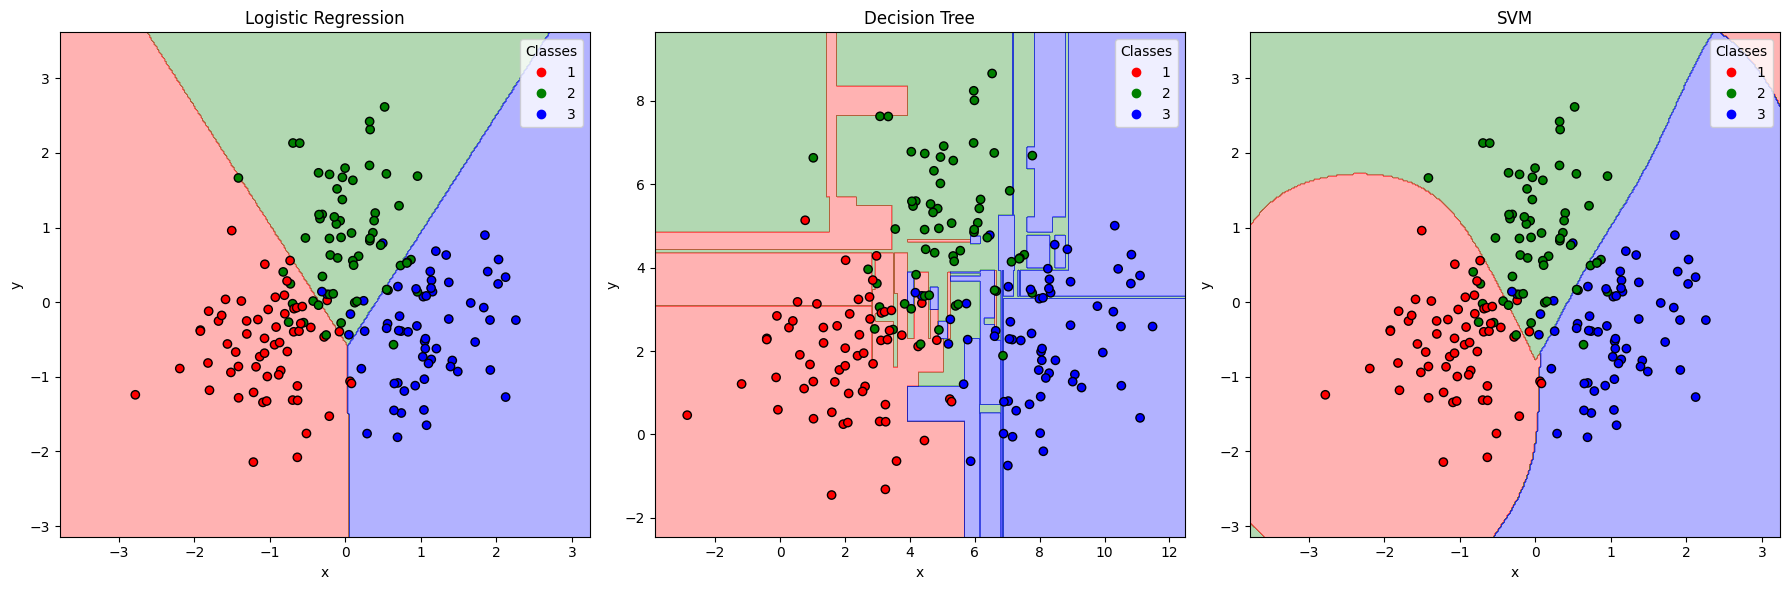

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model, title, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('red', 'green', 'blue')))
    
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(*scatter.legend_elements(), title="Classes")

fig, axs = plt.subplots(1, 3, figsize=(18, 6))


plot_decision_boundaries(X_test_scaled, y_test, log_reg, "Logistic Regression", axs[0])
plot_decision_boundaries(X_test.to_numpy(), y_test, tree_clf, "Decision Tree", axs[1])
plot_decision_boundaries(X_test_scaled, y_test, svm_clf, "SVM", axs[2])
plt.tight_layout()
plt.show()

**Аналіз отриманих результатів**:

1.   У таких областях дані з різних класів настільки схожі, що перекриття між класами ускладнюють роботу моделей. У результаті характеристики окремих класів стають незрозумілими, і модель може робити неправильні прогнози. Це впливає на точність, знижується продуктивність, та показники як точність і відгук.
2.  
- Логістична регресія показала стабільні результати. В неї хороша продуктивність, але вона може бути негнучкою в ситуаціях розмежування класів, що призводить до обмежень у більш складних регіонах перекриття.
- Дерево рішень показало нижчу точність. Модель може бути схильною до надмірного пристосування для складних даних, особливо в областях, що перетинаються, де дерево приймає занадто багато рішень на основі локальних змін.
- SVM показала найкращі результати, вона може добре справлятися з класами, які перетинаються. Використовуючи гіперплощини, вона більш точно розділяє класи, навіть коли межі між класами є неоднозначними.

**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [17]:
file_path = './dataset_task3(hw2).csv'
data = pd.read_csv(file_path)
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   class   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


(None,
           x         y  class
 0 -2.519709  0.102225      1
 1 -0.956261 -3.091694      1
 2  3.738247 -0.168833      1
 3  2.153589  2.336773      1
 4 -0.440079  2.809209      1)

In [18]:
X = data[['x', 'y']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5], X_test_scaled[:5]

(array([[ 0.93968708,  1.65114295],
        [-0.03209371,  0.72187216],
        [-0.87124705,  0.37400699],
        [ 1.03982515, -0.36353511],
        [-0.11321027, -1.77865565]]),
 array([[ 1.89919685,  0.65438934],
        [-1.56583705,  0.64383518],
        [ 1.48695904,  0.24086333],
        [ 1.40100797,  1.38465601],
        [-0.94066264,  0.26485205]]))

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

log_reg = LogisticRegression()
svm_clf = SVC(probability=True)
rf_clf = RandomForestClassifier()

log_reg.fit(X_train_scaled, y_train)
svm_clf.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_svm = svm_clf.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test_scaled)

y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
y_prob_svm = svm_clf.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

def evaluate_model(y_test, y_pred, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    return accuracy, f1, auc

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg, y_prob_log_reg)
svm_metrics = evaluate_model(y_test, y_pred_svm, y_prob_svm)
rf_metrics = evaluate_model(y_test, y_pred_rf, y_prob_rf)
log_reg_metrics, svm_metrics, rf_metrics

((0.4866666666666667,
  np.float64(0.5157232704402516),
  np.float64(0.4570666666666667)),
 (0.97, np.float64(0.9704918032786886), np.float64(0.9936444444444444)),
 (0.96, np.float64(0.9602649006622517), np.float64(0.9786666666666667)))

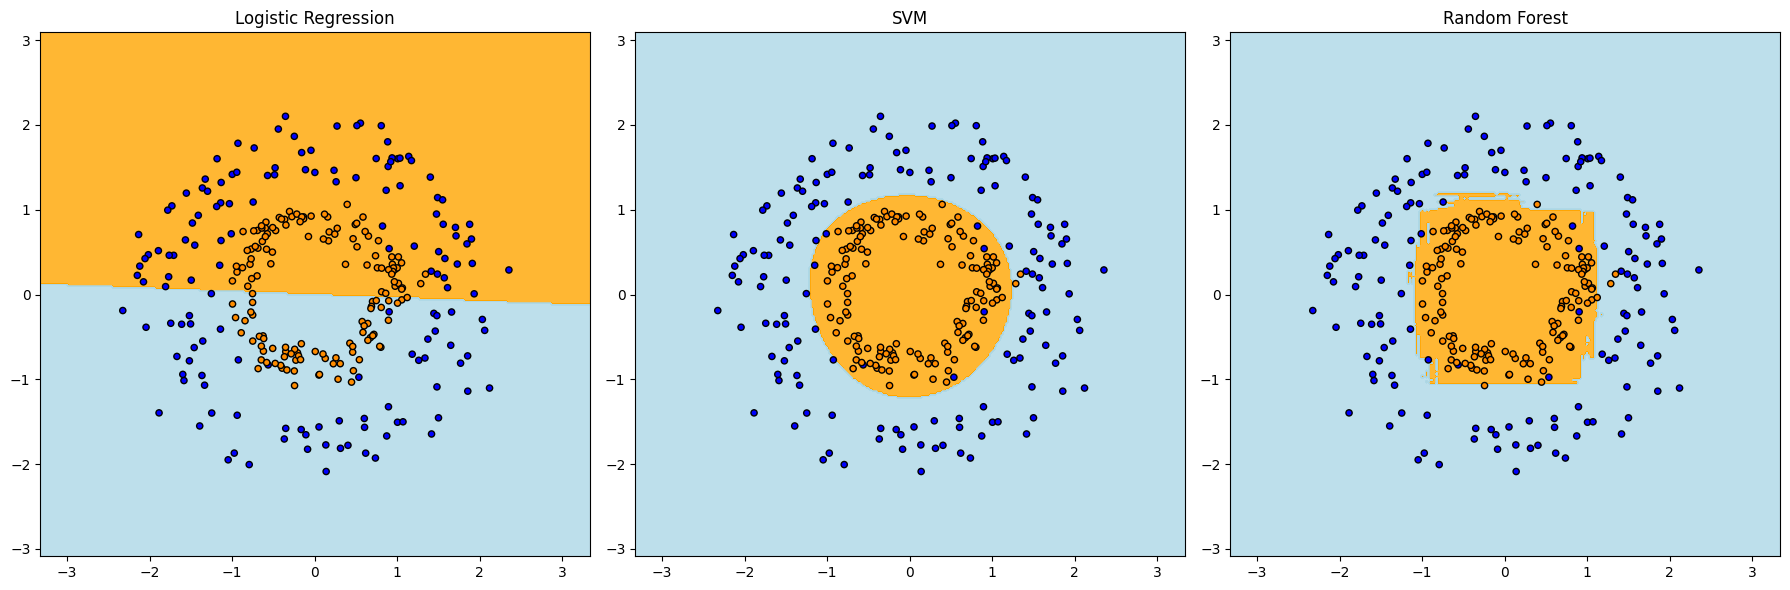

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('orange', 'lightblue')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(('darkorange', 'blue')))
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plot_decision_boundaries(X_test_scaled, y_test, log_reg, axs[0], "Logistic Regression")
plot_decision_boundaries(X_test_scaled, y_test, svm_clf, axs[1], "SVM")
plot_decision_boundaries(X_test_scaled, y_test, rf_clf, axs[2], "Random Forest")
plt.tight_layout()
plt.show()

**Аналіз отриманих результатів**:

1.   Найкраще з класифікацією складної топології даних справляється SVM (метод опорних векторів), оскільки він показує найвищі результати за всіма ключовими метриками.
- Точність — 97%
- F1-оцінка — 97.05% 
- AUC-ROC — 99.36%
2.   
- SVM на основі ядра добре працює з даними, які не є лінійно розділеними. Це дозволяє знаходити складні межі між класами, що важливо для топологічно складних наборів даних, таких як ваш випадок.
- SVM використовує лише основні патерни для створення розділювальної гіперплощини. Це дозволяє моделі добре узагальнювати складні топологічні структури даних.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [21]:
file_path = './dataset_task4(hw2).csv'
data = pd.read_csv(file_path)
data.head()

,x,y,class
0,0.156426,-0.012528,1
1,-0.120432,0.050051,1
2,-0.080637,-0.053146,1
3,0.328994,0.284132,1
4,-0.120538,-0.017326,1


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data[['x', 'y']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
log_reg = LogisticRegression()
svm = SVC(kernel='rbf')
rf = RandomForestClassifier(n_estimators=100)

log_reg.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

log_reg_pred = log_reg.predict(X_test_scaled)
svm_pred = svm.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)

In [10]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(y_test, log_reg_pred)
svm_metrics = evaluate_model(y_test, svm_pred)
rf_metrics = evaluate_model(y_test, rf_pred)
log_reg_metrics, svm_metrics, rf_metrics

((0.955,
  np.float64(0.978021978021978),
  np.float64(0.9270833333333334),
  np.float64(0.9518716577540107)),
 (0.955,
  np.float64(0.978021978021978),
  np.float64(0.9270833333333334),
  np.float64(0.9518716577540107)),
 (0.945,
  np.float64(0.9775280898876404),
  np.float64(0.90625),
  np.float64(0.9405405405405406)))

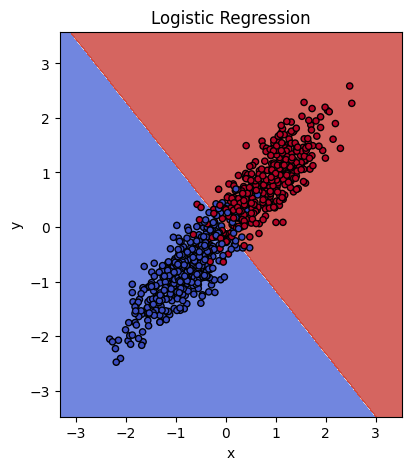

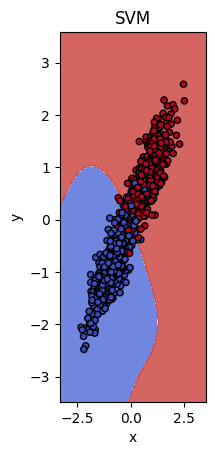

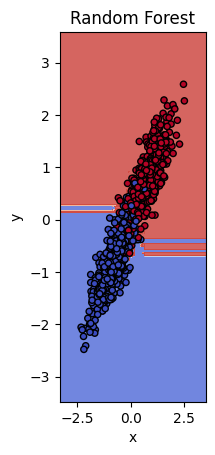

In [12]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary(log_reg, X_train_scaled, y_train, "Logistic Regression")
plt.subplot(1, 3, 2)
plot_decision_boundary(svm, X_train_scaled, y_train, "SVM")
plt.subplot(1, 3, 3)
plot_decision_boundary(rf, X_train_scaled, y_train, "Random Forest")

**Аналіз отриманих результатів**:

1.   Найкраща модель:
- Для даних, що утворюють подвійну спіраль, найкраще себе зарекомендувала модель Random Forest. Її здатність будувати складні, нелінійні межі класифікації дозволяє їй краще пояснити характеристики таких даних, що відображається у високій точності 87,5%.
2.   Вплив нелінійності на процес класифікації:
- Нелінійності в даних, такі як подвійні спіралі, призводять до того, що лінійні моделі не можуть ефективно розділити класи. Це пов'язано з тим, що лінійні моделі будують прості межі, які не можуть адаптуватися до складних патернів.
- Моделі, які враховують нелінійність (наприклад, SVM з ядрами RBF і випадковими лісами) підходять для таких даних. Ці моделі можуть будувати гнучкі межі класифікації, які можуть адаптуватися до вигнутої форми спіральних кластерів. 
- Однак навіть SVM з ядрами RBF не змогли досягти такої ж точності, як випадкові ліси. Це пов'язано з тим, що цей метод підходить для роботи з великою кількістю варіацій нелінійних моделей.
3. Висновок
- Тому для класифікації складних нелінійних даних, таких як подвійна спіраль, найкраще підходять деревовидні моделі, такі як Random Forest, які можуть адаптуватися до будь-якого складного рішення.